In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# dataset from math and portugese subjects performance
math = pd.read_csv('student-mat.csv',sep=';')
por = pd.read_csv('student-por.csv',sep=';')

In [3]:
# create mean score column
math['meanG'] = (math['G1'] + math['G2'] + math['G3']) / 3
por['meanG'] = (por['G1'] + por['G2'] + por['G3']) / 3

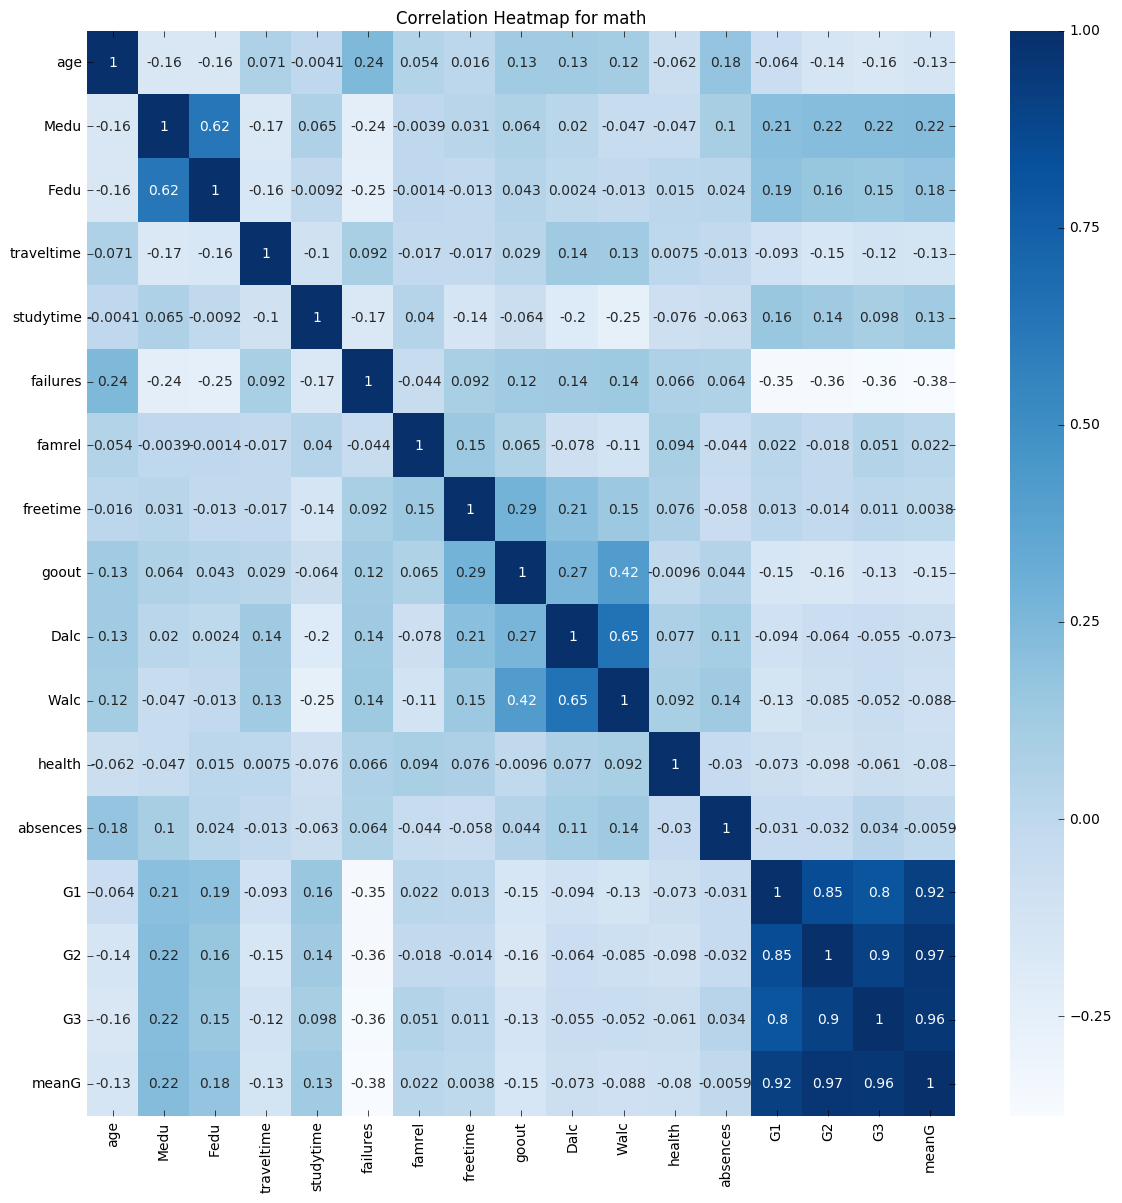

In [12]:
# correlation of data
plt.figure(figsize=(14,14))
plt.title('Correlation Heatmap for math')
sns.heatmap(math.corr(), cmap="Blues", annot=True);

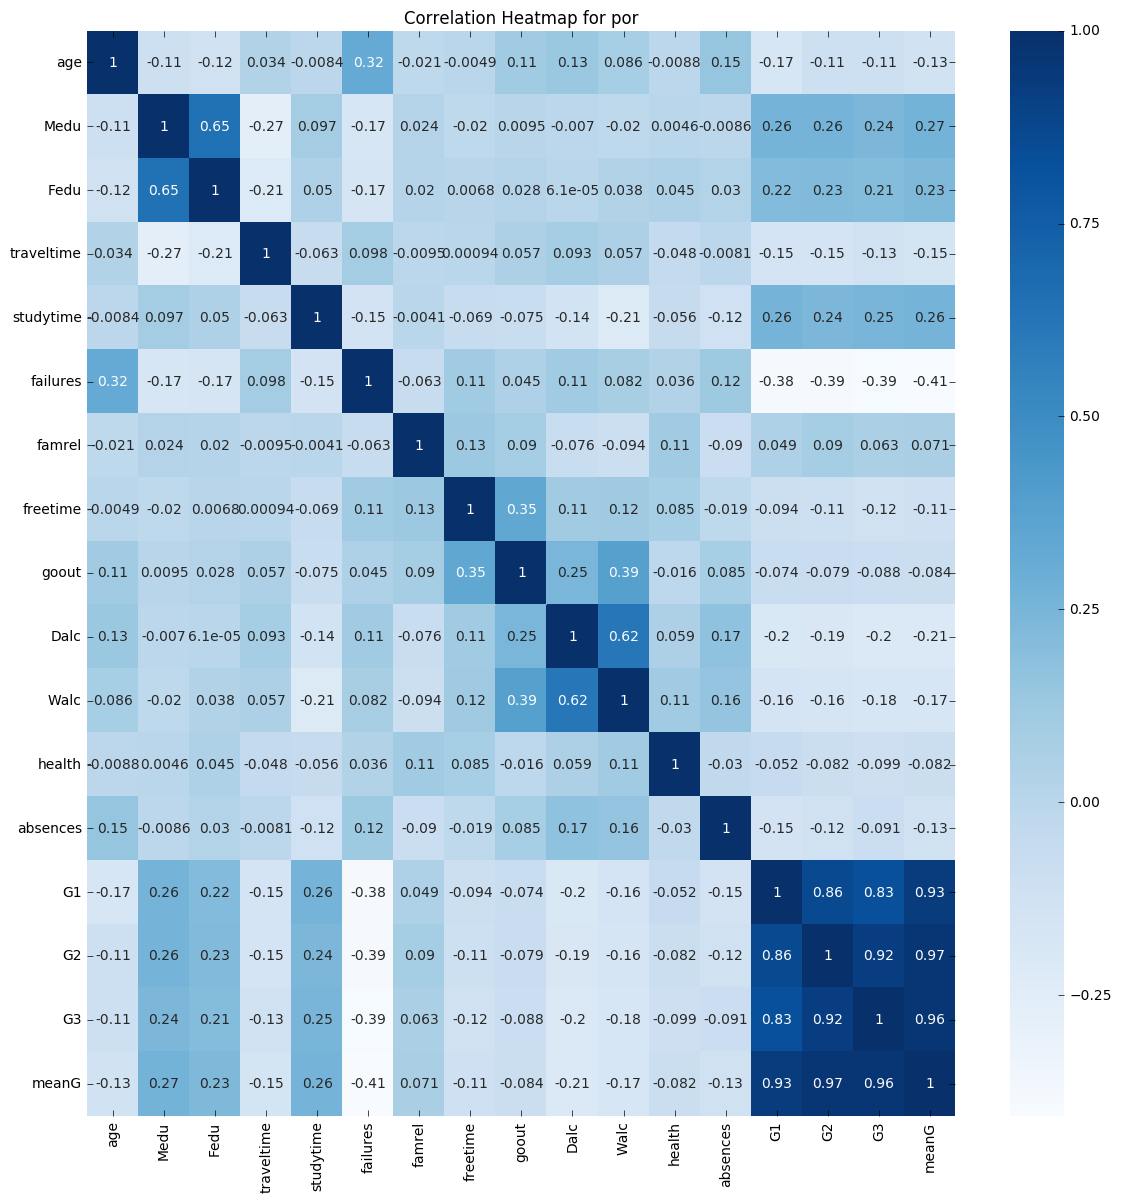

In [11]:
# correlation of data
plt.figure(figsize=(14,14))
plt.title('Correlation Heatmap for por')
sns.heatmap(por.corr(), cmap="Blues", annot=True);

In [13]:
# one interest fact is longer study time will not improve math's scores significantly compared to its effect to portugese' scores

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
XMath = math.drop(['G3','meanG'], axis = 1)
yMath = math['G3']
XMath_train, XMath_test, yMath_train, yMath_test = train_test_split(XMath, yMath, test_size = 0.25, random_state = 0)

In [52]:
# get dummy varibles 
X_train = pd.get_dummies(XMath_train)
X_test = pd.get_dummies(XMath_test)

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
treeFit = tree.fit(X_train, yMath_train)
print("Decisioin Tree Model Score" , ":" , treeFit.score(X_train, yMath_train))

Decisioin Tree Model Score : 1.0


In [67]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NBFit = NB.fit(X_train, yMath_train)
print("Naive Bayes Model Score" , ":" , NBFit.score(X_train, yMath_train))

Naive Bayes Model Score : 0.280405405405


In [66]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
SVM = SVC(kernel = 'linear', random_state = 0)
SVMFit = SVM.fit(X_train, yMath_train);
print("Naive Bayes Model Score" , ":" , SVMFit.score(X_train, yMath_train))

Naive Bayes Model Score : 0.976351351351
